In [29]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [30]:
dir= 'C:\\Users\\PRIYA\\Pictures\\leaf'
categories=['diseased','healthy']
data=[]
for category in categories:
    path=os.path.join(dir,category)
    label=categories.index(category)
    
    for img in os.listdir(path):
        imgpath=os.path.join(path,img)
        leaf_img=cv2.imread(imgpath,0)
        leaf_img=cv2.resize(leaf_img,(50,50))
        image=np.array(leaf_img).flatten()
        
        data.append([image,label])
print(len(data))
pick_in=open('data1.pickle','wb')
pickle.dump(data,pick_in)
pick_in.close()        

32


Accuracy:  1.0
Prediction:  healthy


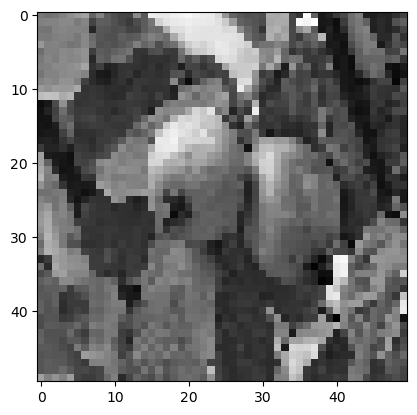

In [33]:
pick_in=open('data1.pickle','rb')
data=pickle.load(pick_in)
pick_in.close()

random.shuffle(data)
features=[]
labels=[]

for feature,label in data:
    features.append(feature)
    labels.append(label)
    
    
xtrain,xtest,ytrain,ytest=train_test_split(features,labels,test_size=0.20)
model= SVC(C=1,kernel='poly',gamma='auto')
model.fit(xtrain, ytrain)

pick= open('model.sav','rb')
model=pickle.load(pick)
pick.close()

prediction= model.predict(xtest)
accuracy= model.score(xtest,ytest)
categories=['diseased','healthy']

print('Accuracy: ',accuracy)

print('Prediction: ',categories[prediction[0]])

myleaf=xtest[0].reshape(50,50)
plt.imshow(myleaf,cmap='gray')
plt.show()